In [ ]:
# Copyright (C) 2023 Elif Cansu YILDIZ
# 
# This program is free software; you can redistribute it and/or modify it under
# the terms of the GNU General Public License as published by the Free Software
# Foundation; either version 3 of the License, or (at your option) any later
# version.
# 
# This program is distributed in the hope that it will be useful, but WITHOUT
# ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS
# FOR A PARTICULAR PURPOSE. See the GNU General Public License for more
# details.
# 
# You should have received a copy of the GNU General Public License along with
# this program; if not, see <http://www.gnu.org/licenses/>.

# Experiments

In [5]:
from medai.utils.eval_utils2 import evaluate_SASN, evaluate_ChexNet_baseline, evaluate_maskrcnn, evaluate_basic_model
from medai.utils.eval_utils2 import show_significance_interval_F1, show_significance_interval_balanced_acc, show_significance_interval_AUROC, show_significance_interval_AP

import medai.models.SASN_vanilla as sasn_vanilla
import medai.models.SASN_split as sasn_split
import medai.models.densenet as basic_model
from medai.utils import eval_utils
import medai.config as config

import pickle
import yaml
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Configurations

In [4]:
with open("../configs/experiment_set1.yaml", "r") as stream:
    experiments = yaml.safe_load(stream)

target_masks_pickle_path = "preds_targets/heatmaps/ground_truth_masks.pickle"
target_bboxes_pickle_path = "preds_targets/bounding_boxes/ground_truth_boxes.pickle"

In [31]:
validation_scores_csv_path = "csv_outputs/valset_results/experiment_set1_valset_scores.csv"
test_scores_csv_path = "csv_outputs/experiment_set1_testset_scores.csv"

## Classification Scores

In [32]:
evaluate_SASN(model=sasn_vanilla.SiameseNetwork(include_feature_comparison=False),
              model_name="sasn_vanilla",
              model_path=os.path.join(config.BASE_DIR, experiments["SASN_vanilla"]["model_path"]),
              pickle_path=os.path.join(config.BASE_DIR, experiments["SASN_vanilla"]["labels_pickle_path"]),
              experiment_name=experiments["SASN_vanilla"]["exp_name"],
              threshold=0.5,
              sasn_contrastive=False,
              config_file="sasn_config.yaml",
              val_scores_save_path=validation_scores_csv_path,
              test_scores_save_path=test_scores_csv_path)

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers'])
Val Lengths:  303   303
val_metric_scores:  {'accuracy': tensor(0.7195), 'F1 score': tensor(0.7859), 'precision': tensor(0.9630), 'recall': tensor(0.6638), 'specificity': tensor(0.9118), 'auroc': tensor(0.8576), 'avg precision': tensor(0.9464)}
Test Lengths:  553   553
test_metric_scores:  {'accuracy': tensor(0.7450), 'F1 score': tensor(0.8291), 'precision': tensor(0.9884), 'recall': tensor(0.7140), 'specificity': tensor(0.9459), 'auroc': tensor(0.8995), 'avg precision': tensor(0.9822)}
Validation Metric Scores: {'accuracy': tensor(0.7195), 'F1 score': tensor(0.7859), 'precision': tensor(0.9630), 'recall': tensor(0.6638), 'specificity': tensor(0.9118), 'auroc': tensor(0.8576), 'avg precision': tensor(0.9464)} 
Test Metric Scores: {'accuracy': tensor(0.7450), 'F1 score': tensor(0.8291), 'precision': tensor(0.9884), 'recall': tensor(0.7140), 'specifici

In [33]:
evaluate_SASN(model=sasn_split.SiameseNetwork(include_feature_comparison=False),
              model_name="sasn_split",
              model_path=os.path.join(config.BASE_DIR, experiments["SASN_split"]["model_path"]),
              pickle_path=os.path.join(config.BASE_DIR, experiments["SASN_split"]["labels_pickle_path"]),
              experiment_name=experiments["SASN_split"]["exp_name"],
              threshold=0.5,
              sasn_contrastive=False,
              config_file="sasn_config.yaml",
              val_scores_save_path=validation_scores_csv_path,
              test_scores_save_path=test_scores_csv_path)

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers'])
Val Lengths:  303   303
val_metric_scores:  {'accuracy': tensor(0.7261), 'F1 score': tensor(0.7930), 'precision': tensor(0.9578), 'recall': tensor(0.6766), 'specificity': tensor(0.8971), 'auroc': tensor(0.8568), 'avg precision': tensor(0.9487)}
Test Lengths:  553   553
test_metric_scores:  {'accuracy': tensor(0.7523), 'F1 score': tensor(0.8351), 'precision': tensor(0.9858), 'recall': tensor(0.7244), 'specificity': tensor(0.9324), 'auroc': tensor(0.8973), 'avg precision': tensor(0.9821)}
Validation Metric Scores: {'accuracy': tensor(0.7261), 'F1 score': tensor(0.7930), 'precision': tensor(0.9578), 'recall': tensor(0.6766), 'specificity': tensor(0.8971), 'auroc': tensor(0.8568), 'avg precision': tensor(0.9487)} 
Test Metric Scores: {'accuracy': tensor(0.7523), 'F1 score': tensor(0.8351), 'precision': tensor(0.9858), 'recall': tensor(0.7244), 'specifici

In [ ]:
evaluate_ChexNet_baseline(model_path=os.path.join(config.BASE_DIR, experiments["CheXNet"]["model_path"]),
                          pickle_path=os.path.join(config.BASE_DIR, experiments["CheXNet"]["labels_pickle_path"]),
                          experiment_name=experiments["CheXNet"]["exp_name"],
                          threshold=0.5,
                          config_file="chexnet_config.yaml",
                          val_scores_save_path=validation_scores_csv_path,
                          test_scores_save_path=test_scores_csv_path)

In [ ]:
evaluate_maskrcnn(model_path=os.path.join(config.BASE_DIR, experiments["MaskRCNN"]["model_path"]),
                  pickle_path=os.path.join(config.BASE_DIR, experiments["MaskRCNN"]["labels_pickle_path"]),
                  experiment_name=experiments["MaskRCNN"]["exp_name"],
                  threshold=0.5,
                  config_file="maskrcnn_config.yaml",
                  test_scores_save_path=test_scores_csv_path)

In [21]:
evaluate_basic_model(model=basic_model.Network(),
                     model_name="basic_model",
                     model_path=os.path.join(config.BASE_DIR, experiments["basic_model"]["model_path"]),
                     pickle_path=os.path.join(config.BASE_DIR, experiments["basic_model"]["labels_pickle_path"]),
                     experiment_name=experiments["basic_model"]["exp_name"],
                     threshold=0.5,
                     config_file="sasn_config.yaml",
                     val_scores_save_path=validation_scores_csv_path,
                     test_scores_save_path=test_scores_csv_path)

Validation Metric Scores: {'accuracy': tensor(0.7757), 'F1 score': tensor(0.7604), 'precision': tensor(0.7828), 'recall': tensor(0.7393), 'specificity': tensor(0.8095), 'auroc': tensor(0.8533), 'avg precision': tensor(0.8489)} 
Test Metric Scores: {'accuracy': tensor(0.7685), 'F1 score': tensor(0.8483), 'precision': tensor(0.9808), 'recall': tensor(0.7474), 'specificity': tensor(0.9054), 'auroc': tensor(0.8839), 'avg precision': tensor(0.9796)}


In [34]:
SASN_vanilla_preds_targets = eval_utils.load_experiment_preds_targets(file_name=experiments["SASN_vanilla"]["labels_pickle_path"])
SASN_split_preds_targets = eval_utils.load_experiment_preds_targets(file_name=experiments["SASN_split"]["labels_pickle_path"])
#CheXNet_preds_targets = eval_utils.load_experiment_preds_targets(file_name=experiments["CheXNet"]["labels_pickle_path"])
#maskrcnn_preds_targets = eval_utils.load_experiment_preds_targets(file_name=experiments["MaskRCNN"]["labels_pickle_path"])

SASN_vanilla_val_preds, SASN_vanilla_val_targets = SASN_vanilla_preds_targets["val_pred_labels"], SASN_vanilla_preds_targets["val_target_labels"]
SASN_vanilla_test_preds, SASN_vanilla_test_targets = SASN_vanilla_preds_targets["test_pred_labels"], SASN_vanilla_preds_targets["test_target_labels"]

SASN_split_val_preds, SASN_split_val_targets = SASN_split_preds_targets["val_pred_labels"], SASN_split_preds_targets["val_target_labels"]
SASN_split_test_preds, SASN_split_test_targets = SASN_split_preds_targets["test_pred_labels"], SASN_split_preds_targets["test_target_labels"]

#CheXNet_val_preds, CheXNet_val_targets = CheXNet_preds_targets["val_pred_labels"], CheXNet_preds_targets["val_target_labels"]
#CheXNet_test_preds, CheXNet_test_targets = CheXNet_preds_targets["test_pred_labels"], CheXNet_preds_targets["test_target_labels"]

#MaskRCNN_test_preds, MaskRCNN_test_targets = maskrcnn_preds_targets["test_pred_labels"], maskrcnn_preds_targets["test_target_labels"]

In [22]:
basic_model_preds_targets = eval_utils.load_experiment_preds_targets(file_name=experiments["basic_model"]["labels_pickle_path"])
basic_model_val_preds, basic_model_val_targets = basic_model_preds_targets["val_pred_labels"], basic_model_preds_targets["val_target_labels"]
basic_model_test_preds, basic_model_test_targets = basic_model_preds_targets["test_pred_labels"], basic_model_preds_targets["test_target_labels"]

In [35]:
def get_best_thresholds(preds, targets, to_save=False, exp_name="", save_path=None): 
    result = eval_utils.get_best_threshold_for_F1(preds, targets, threshold_range=(0.01,0.99,0.01))  #threshold_range=(0.01,0.99,0.01)
    print(result)
    best_threshold = result["thresh"]

    test_metric_scores = eval_utils.calculate_metrics(preds, targets, threshold=best_threshold)
    print(test_metric_scores)
    
    if to_save:
        eval_utils.save_score_table(test_metric_scores, experiment_name=exp_name, threshold=best_threshold, save_path=test_scores_csv_path)

    result = eval_utils.get_best_threshold_for_balanced_acc(preds, targets)
    print(result)
    best_threshold = result["thresh"]

    test_metric_scores = eval_utils.calculate_metrics(preds, targets, threshold=best_threshold)
    print(test_metric_scores)
    
    if to_save:
        eval_utils.save_score_table(test_metric_scores, experiment_name=exp_name, threshold=best_threshold, save_path=test_scores_csv_path)

In [38]:
#predictions, targets, model_name, exp_name = SASN_vanilla_test_preds, SASN_vanilla_test_targets, "sasn_vanilla", experiments["SASN_vanilla"]["exp_name"]
predictions, targets, model_name, exp_name = SASN_split_test_preds, SASN_split_test_targets, "sasn_split", experiments["SASN_split"]["exp_name"]
#predictions, targets, model_name, exp_name = CheXNet_test_preds, CheXNet_test_targets, "CheXNet", experiments["CheXNet"]["exp_name"]
#predictions, targets, model_name, exp_name = MaskRCNN_test_preds, MaskRCNN_test_targets, "MaskRCNN", experiments["MaskRCNN"]["exp_name"]
#predictions, targets, model_name, exp_name = basic_model_test_preds, basic_model_test_targets, "basic_model", experiments["basic_model_seed22"]["exp_name"]

In [39]:
get_best_thresholds(predictions, targets, to_save=True, exp_name=exp_name, save_path=test_scores_csv_path)

{'thresh': 0.02, 'F1 Score': 93.78}
{'accuracy': tensor(0.8897), 'F1 score': tensor(0.9378), 'precision': tensor(0.9163), 'recall': tensor(0.9603), 'specificity': tensor(0.4324), 'auroc': tensor(0.8973), 'avg precision': tensor(0.9821)}
thresh: 0.1 Val Balanced Acc: 0.8110787868499756
thresh: 0.2 Val Balanced Acc: 0.8104722499847412
thresh: 0.3 Val Balanced Acc: 0.8223353624343872
thresh: 0.4 Val Balanced Acc: 0.8149720430374146
thresh: 0.5 Val Balanced Acc: 0.8284291625022888
thresh: 0.6 Val Balanced Acc: 0.8138153553009033
thresh: 0.7 Val Balanced Acc: 0.788763165473938
thresh: 0.8 Val Balanced Acc: 0.7688738107681274
thresh: 0.9 Val Balanced Acc: 0.7150877714157104
{'thresh': 0.5, 'Balanced Acc': 82.84}
{'accuracy': tensor(0.7523), 'F1 score': tensor(0.8351), 'precision': tensor(0.9858), 'recall': tensor(0.7244), 'specificity': tensor(0.9324), 'auroc': tensor(0.8973), 'avg precision': tensor(0.9821)}


In [35]:
thresh = 0.5

_ = show_significance_interval_F1(predictions, targets, threshold=thresh, model=model_name, return_figure=False)
_ = show_significance_interval_AUROC(predictions, targets, model=model_name, return_figure=False)
_ = show_significance_interval_balanced_acc(predictions, targets, threshold=thresh, model=model_name, return_figure=False)
_ = show_significance_interval_AP(predictions, targets, model=model_name, return_figure=False)

/root/MastersThesis/venv/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (BootStrapper). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_full_state_property`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


Significance interval for F1 Score: [77.68, 83.32]
Significance interval for AUROC: [85.26, 92.55]
Significance interval for recall: [63.55, 72.5]
Significance interval for specificity: [86.34, 98.65]
Significance interval for balanced accuracy: [74.94, 85.58]
Significance interval for average precision: [96.99, 98.66]


----------

## ROC curve and Precision-Recall curve

In [ ]:
def get_data(pickle_file):
    if pickle_file is None or pickle_file=="None":
        print("No such file or directory")
        return
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
    return data

In [12]:
SASN_vanilla_pred_labels_path = os.path.join(config.BASE_DIR, "notebooks/preds_targets_imbalanced_data/labels/set1/exp2_spicedpie47_preds_vals.pickle")
SASN_split_pred_labels_path = os.path.join(config.BASE_DIR, "notebooks/preds_targets_imbalanced_data/labels/set1/exp6_stoicyogurt48_preds_vals.pickle")
CheXNet_pred_labels_path = os.path.join(config.BASE_DIR, "notebooks/preds_targets_imbalanced_data/labels/set1/baseline_etherealgorge49_preds_targets.pickle")
MaskRCNN_pred_labels_path = os.path.join(config.BASE_DIR, "notebooks/preds_targets_imbalanced_data/labels/set1/maskrcnn-genial-planet-58.pickle")

SASN_vanilla_test_pred_labels = get_data(SASN_vanilla_pred_labels_path)["test_pred_labels"]
SASN_split_test_pred_labels = get_data(SASN_split_pred_labels_path)["test_pred_labels"]
CheXNet_test_pred_labels = get_data(CheXNet_pred_labels_path)["test_pred_labels"]
MaskRCNN_test_pred_labels = get_data(MaskRCNN_pred_labels_path)["test_pred_labels"]

In [13]:
import os
import medai.config as config
from medai.data.loader import ChestDataModule
from medai.data.datasets import ChestXDetDataset

config_file = "config.yaml"
config_file_path = os.path.join(config.CONFIG_DIR, config_file)
with open(config_file_path, "r") as stream:
    params = yaml.safe_load(stream)

params["dataloader"]["batch_size"] = 1
params["dataset"]["train"]["transform"] = None

sasn_data_module = ChestDataModule(dataset_class=ChestXDetDataset, **params["dataloader"])
sasn_data_module.setup("fit", **params["dataset"]["train"])
sasn_data_module.setup("test", **params["dataset"]["test"])

In [6]:
sasn_data_module.test_dataset.num_binary_labels

{'Healthy': 71, 'Diseased': 482}

In [7]:
import torch

test_target_labels = torch.asarray([])
for sample in sasn_data_module.test_dataloader:
    img, img_f, target_map = sample
    with torch.no_grad():
        test_target_labels = torch.hstack((test_target_labels, torch.max(target_map.detach().cpu().reshape(len(target_map), -1), dim=1)[0]))

In [27]:
from torchmetrics import ROC, PrecisionRecallCurve
from torchmetrics.classification import BinaryROC

def roc_curve(pred, target):
    roc = ROC(task="binary")
    #roc = BinaryROC(thresholds=50)
    fpr, tpr, thresholds = roc(pred, target)
    return fpr, tpr, thresholds

def pr_curve(pred, target):
    pr_curve = PrecisionRecallCurve(task="binary")
    precision, recall, thresholds = pr_curve(pred, target)
    return precision, recall, thresholds

In [28]:
SASN_vanilla_fpr_tpr_thresh = roc_curve(SASN_vanilla_test_pred_labels, test_target_labels)
SASN_split_fpr_tpr_thresh = roc_curve(SASN_split_test_pred_labels, test_target_labels)
CheXNet_fpr_tpr_thresh = roc_curve(CheXNet_test_pred_labels, test_target_labels)
MaskRCNN_fpr_tpr_thresh = roc_curve(MaskRCNN_test_pred_labels, test_target_labels)

In [29]:
SASN_vanilla_prec_recall_thresh = pr_curve(SASN_vanilla_test_pred_labels, test_target_labels)
SASN_split_prec_recall_thresh = pr_curve(SASN_split_test_pred_labels, test_target_labels)
CheXNet_prec_recall_thresh = pr_curve(CheXNet_test_pred_labels, test_target_labels)
MaskRCNN_prec_recall_thresh = pr_curve(MaskRCNN_test_pred_labels, test_target_labels)

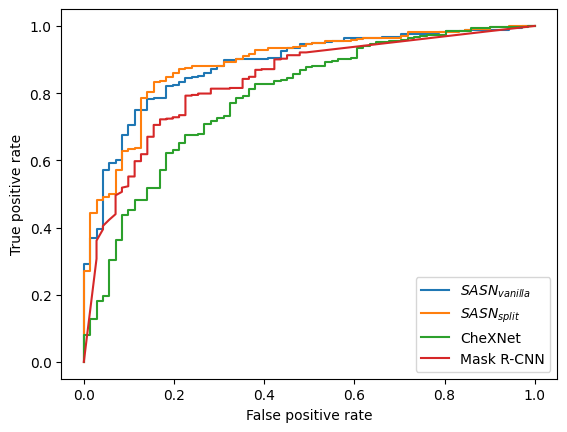

In [38]:
import matplotlib.pyplot as plt
plt.plot(SASN_vanilla_fpr_tpr_thresh[0], SASN_vanilla_fpr_tpr_thresh[1], label="$SASN_{vanilla}$")
plt.plot(SASN_split_fpr_tpr_thresh[0], SASN_split_fpr_tpr_thresh[1], label="$SASN_{split}$")
plt.plot(CheXNet_fpr_tpr_thresh[0], CheXNet_fpr_tpr_thresh[1], label="CheXNet")
plt.plot(MaskRCNN_fpr_tpr_thresh[0], MaskRCNN_fpr_tpr_thresh[1], label="Mask R-CNN")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()
plt.savefig("roc_curve.svg")

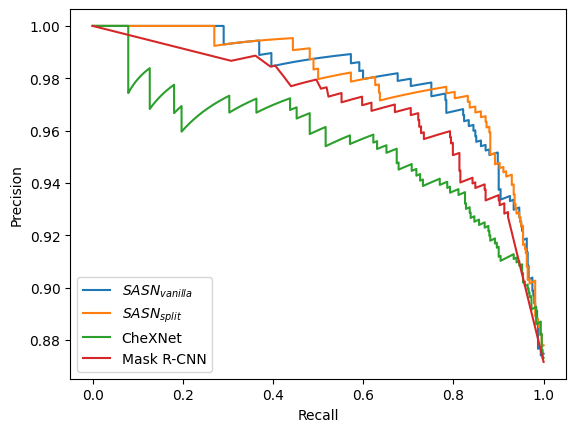

In [36]:
import matplotlib.pyplot as plt
plt.plot(SASN_vanilla_prec_recall_thresh[1], SASN_vanilla_prec_recall_thresh[0], label="$SASN_{vanilla}$")
plt.plot(SASN_split_prec_recall_thresh[1], SASN_split_prec_recall_thresh[0], label="$SASN_{split}$")
plt.plot(CheXNet_prec_recall_thresh[1], CheXNet_prec_recall_thresh[0], label="CheXNet")
plt.plot(MaskRCNN_prec_recall_thresh[1], MaskRCNN_prec_recall_thresh[0], label="Mask R-CNN")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.savefig("pr_curve.svg")